In [1]:
import numpy as np
import pandas as pd

### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [2]:
# 타이타닉 데이터 가져오기

In [3]:
titanic = pd.read_csv('train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제

In [5]:
titanic_df = pd.DataFrame(titanic, columns = ["Survived","Age"])
titanic_df.dropna(inplace=True)
titanic_df.tail()

,Survived,Age
885,0,39.0
886,0,27.0
887,1,19.0
889,1,26.0
890,0,32.0


In [6]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입

In [7]:
def age(num):
    return (num // 10) *10
titanic_df["Age"] = titanic_df["Age"].astype(int)
titanic_df["Ages"] = titanic_df["Age"].apply(age).astype(int)
titanic_df.tail()

,Survived,Age,Ages
885,0,39,30
886,0,27,20
887,1,19,10
889,1,26,20
890,0,32,30


In [8]:
# 연령대별로 생존률

In [9]:
titanic_df["Count"] = 1

In [10]:
titanic_df.tail()

,Survived,Age,Ages,Count
885,0,39,30,1
886,0,27,20,1
887,1,19,10,1
889,1,26,20,1
890,0,32,30,1


In [11]:
p1 = titanic_df.pivot_table(values = "Count", index = "Ages", columns="Survived",\
                            aggfunc = np.sum)
p1

Survived,0,1
Ages,,
0,24.0,38.0
10,61.0,41.0
20,143.0,77.0
30,94.0,73.0
40,55.0,34.0
50,28.0,20.0
60,13.0,6.0
70,6.0,NaN
80,NaN,1.0


In [12]:
p1["survived_rate"] = p1[1] / (p1[0] + p1[1]) * 100
p1

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.290323
10,61.0,41.0,40.196078
20,143.0,77.0,35.000000
30,94.0,73.0,43.712575
40,55.0,34.0,38.202247
50,28.0,20.0,41.666667
60,13.0,6.0,31.578947
70,6.0,NaN,NaN
80,NaN,1.0,NaN


In [13]:
p1.style.format({"survived_rate":'{:.2f}'})

Survived,0,1,survived_rate
Ages,,,
0,24,38,61.29
10,61,41,40.20
20,143,77,35.00
30,94,73,43.71
40,55,34,38.20
50,28,20,41.67
60,13,6,31.58
70,6,nan,nan
80,nan,1,nan


In [14]:
p1.dropna(inplace=True)
p1

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.290323
10,61.0,41.0,40.196078
20,143.0,77.0,35.000000
30,94.0,73.0,43.712575
40,55.0,34.0,38.202247
50,28.0,20.0,41.666667
60,13.0,6.0,31.578947


In [15]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
p1

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.290323
10,61.0,41.0,40.196078
20,143.0,77.0,35.000000
30,94.0,73.0,43.712575
40,55.0,34.0,38.202247
50,28.0,20.0,41.666667
60,13.0,6.0,31.578947


In [18]:
p1.columns = ['non_survived','survived','survived_rate']
p1

,non_survived,survived,survived_rate
Ages,,,
0,24.0,38.0,61.290323
10,61.0,41.0,40.196078
20,143.0,77.0,35.000000
30,94.0,73.0,43.712575
40,55.0,34.0,38.202247
50,28.0,20.0,41.666667
60,13.0,6.0,31.578947


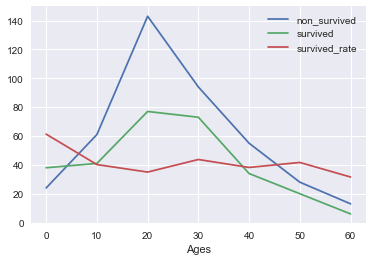

In [19]:
plt.plot(p1["non_survived"], label = "non_survived")
plt.plot(p1["survived"], label = "survived")
plt.plot(p1["survived_rate"], label = "survived_rate")
plt.xlabel("Ages")
plt.legend(loc=0)
plt.show()